CODESOFT  
AUTHOR : SUNITA SAHU  
ASSIGNMENT PROJECT 5 : CREDIT CARD FRAUD DETECTION   
AIM : The aim of the credit card fraud detection project is to accurately identify fraudulent transactions from a dataset of credit card transactions, helping financial institutions prevent fraud, minimize losses, and ensure the security of their customers' transactions.

-----------------------------------------------------------------------------------------------------------------

The code block imports necessary libraries for data analysis and visualization (numpy, pandas, matplotlib, seaborn), machine learning (sklearn, scipy), and sets configurations for warnings, plot size, random seed, and class labels for a fraud detection task using outlier detection methods (IsolationForest, LocalOutlierFactor, OneClassSVM).

In [1]:
import numpy as np
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14,8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]


This code loads a dataset from the file `creditcardfrauddetectiondataset.csv` into a pandas DataFrame named `data`, using a comma as the separator, and then displays the first five rows of the DataFrame.

In [2]:
data = pd.read_csv('creditcardfrauddetectiondataset.csv', sep = ',')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

EXPLARATORY Data Analysis

In [4]:
data.isnull().values.any()

False

This code counts the occurrences of each class (fraudulent and normal transactions) in the 'Class' column of the dataset, plots the distribution as a bar chart, and labels the axes and title for clarity.

Text(0, 0.5, 'Frequency')

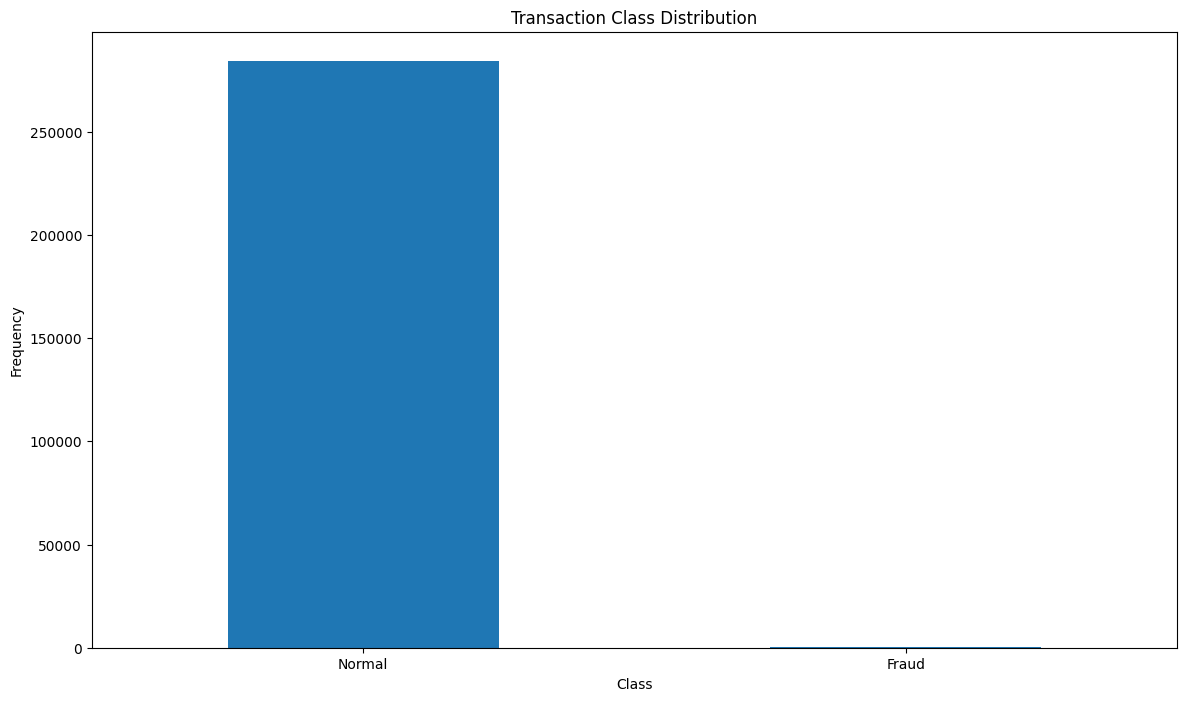

In [5]:
count_classes = pd.value_counts(data['Class'], sort=True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel('Class')
plt.ylabel('Frequency')

Getting the Fraud and the normal datasets

In [6]:
fraud = data[data['Class']==1]
normal=data[data['Class']==0]

In [7]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


Need to analyze more amount of information from the transaction data. Also how different are the amount of money used in different transaction classes?

In [8]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [9]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

This code creates a subplot with two panels vertically stacked. It plots histograms of transaction amounts for both fraudulent and normal transactions, setting the number of bins to 50 and limits the x-axis to a range of 0 to 20,000 dollars. The y-axis scale is set to logarithmic for better visualization of the data distribution.

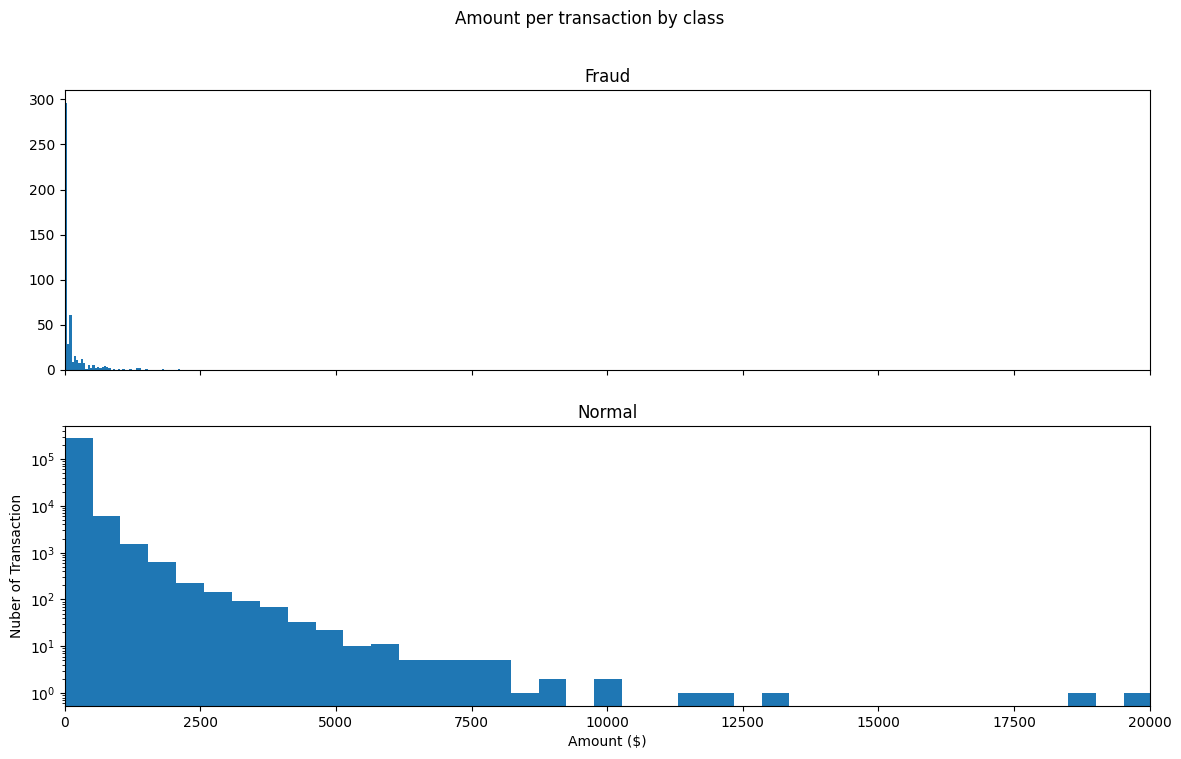

In [10]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Nuber of Transaction')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();                   

This code creates a subplot with two panels vertically stacked. It plots a scatter plot of transaction time against transaction amount for both fraudulent and normal transactions. The x-axis represents time in seconds, and the y-axis represents the transaction amount. Each subplot is titled according to the class it represents (fraudulent or normal).

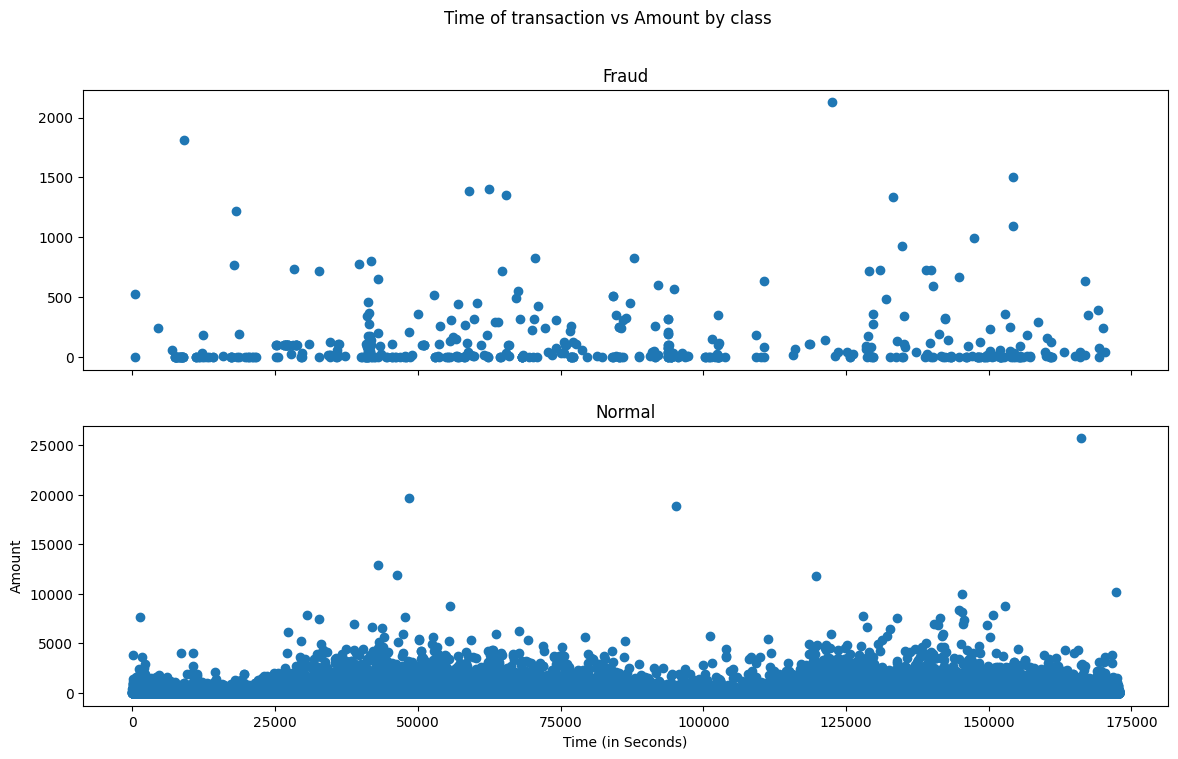

In [11]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show();                   

Taking sample of the data

In [12]:
data1 = data.sample(frac=0.1,random_state=1)
data1.shape

(28481, 31)

In [13]:
data.shape

(284807, 31)

Determining the number of Fraud and Valid transactions in the dataset!

In [14]:
Fraud = data1[data1['Class']==1]
Valid = data1[data1['Class']==0]
outlier_fraction = len(Fraud)/float(len(Valid))

In [15]:
print(outlier_fraction)
print("Fraud Cases : {}".format(len(Fraud)))
print("Valid Cases : {}".format(len(Valid)))

0.0017234102419808666
Fraud Cases : 49
Valid Cases : 28432


Correlation

This code calculates the correlation matrix (`corrmat`) for the DataFrame `data1`, selects the top correlated features, and then generates a heatmap using seaborn to visualize the correlations among these features. The heatmap annotates the correlation values and uses the "Blues" color map for representation.

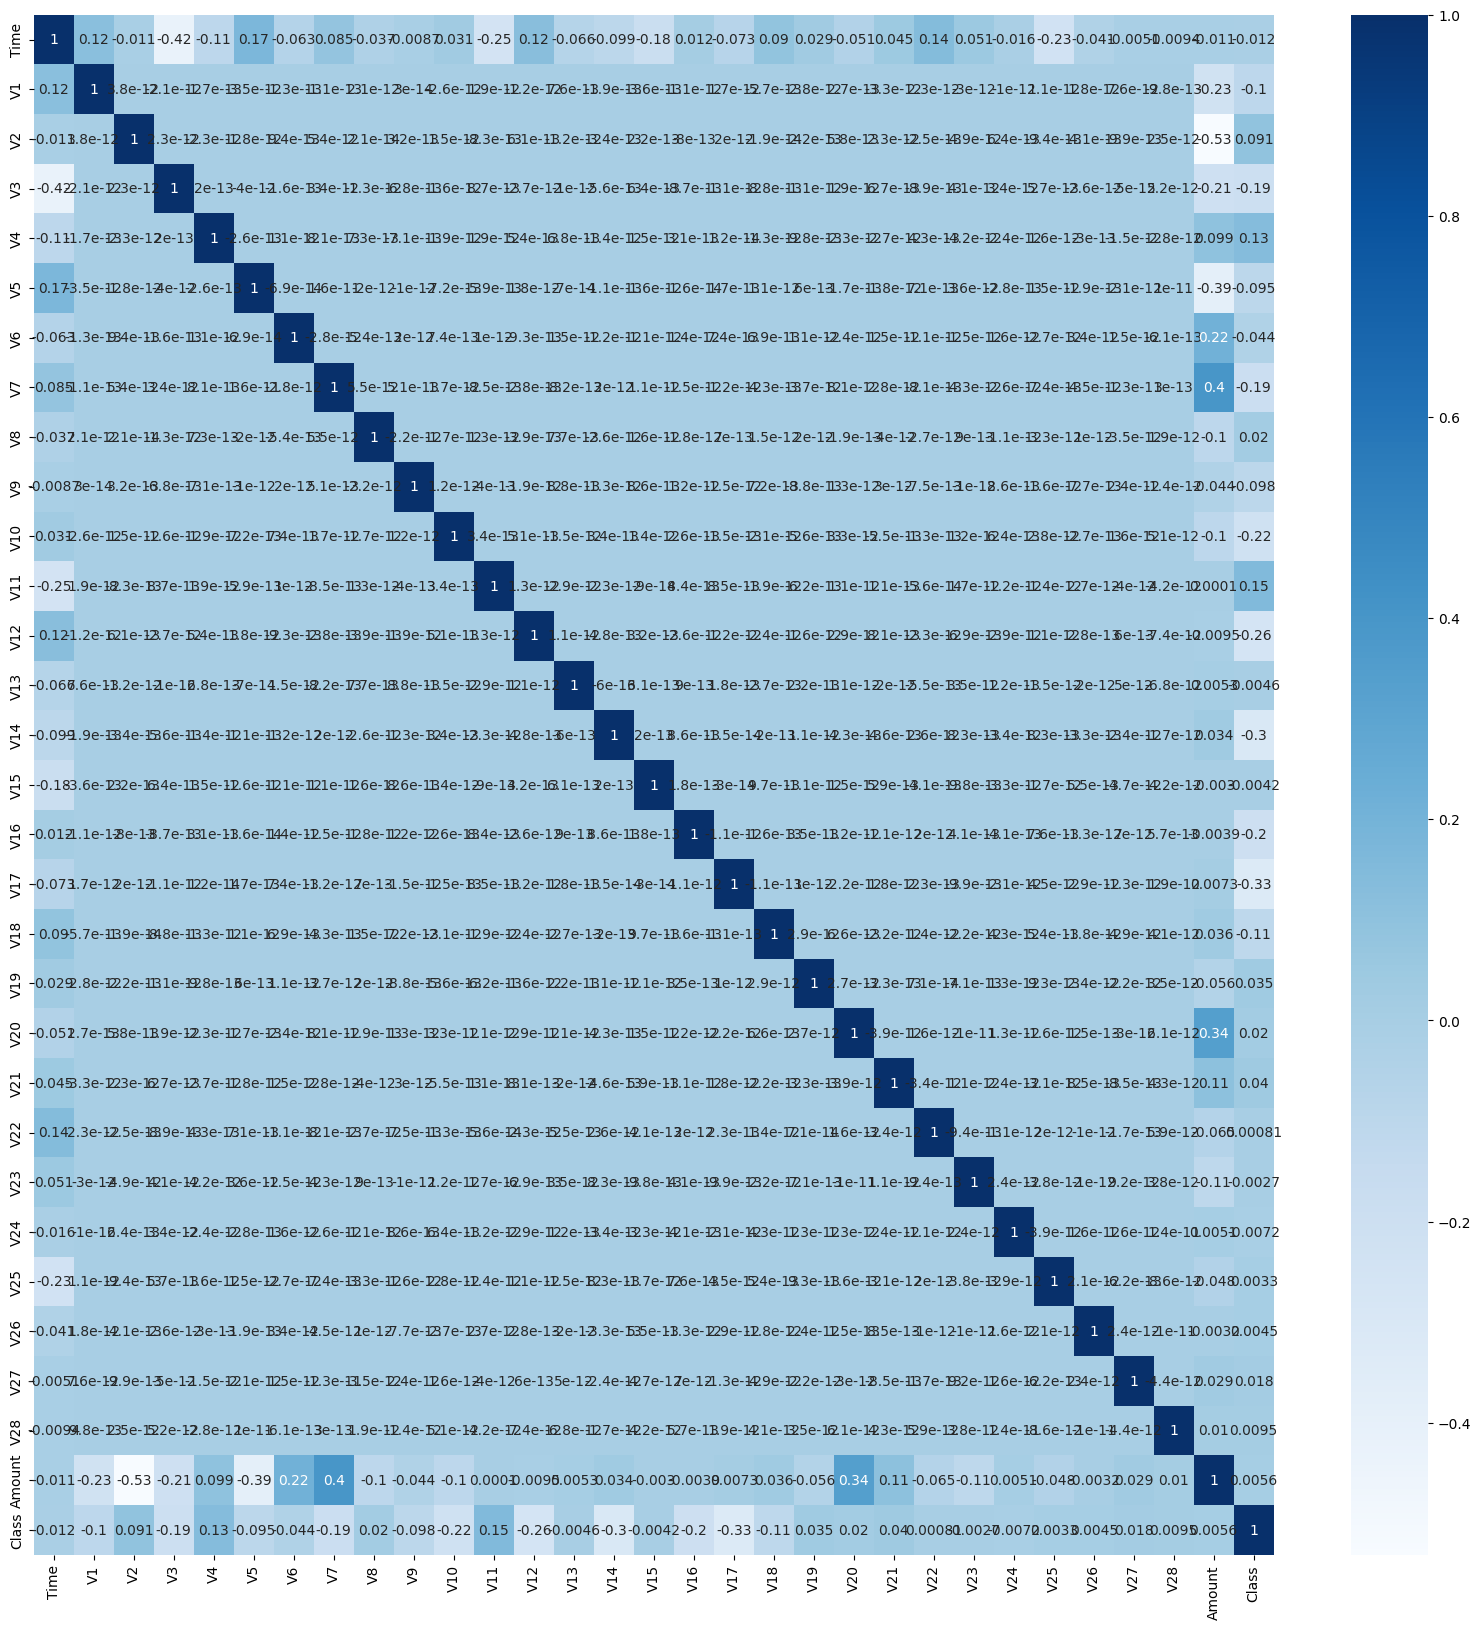

In [16]:
import seaborn as sns
corrmat = data1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(data[top_corr_features].corr(),annot=True, cmap="Blues")

Creating Independent and Dependent features, Filter the columns to remove unwanted data and store the variable to be predicted.

In [17]:
columns = data1.columns.tolist()
columns = [c for c in columns if c not in ["Class"]]
target = "Class"
state = np.random.RandomState(42)
X = data1[columns]
Y = data1[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)


MODEL PREDICTION

Algorithms to be used:

Isolation Forest Algorithm:

The Isolation Forest algorithm is a novel approach to anomaly detection, particularly adept at identifying outliers in high-dimensional datasets. Unlike traditional methods that aim to model the normal behavior of data, Isolation Forest focuses on isolating anomalies directly. It does so by randomly selecting features and then partitioning the dataset using randomly chosen split values. This process is repeated recursively until each data point is isolated. Anomalies, being rare and different from the majority of data points, are typically isolated faster and with fewer splits than normal data points. This results in shorter path lengths in the isolation tree structure for anomalies.

One of the key advantages of Isolation Forest is its ability to efficiently handle large datasets with high-dimensional features. It does not rely on distance metrics or density estimation, making it less sensitive to the curse of dimensionality. Additionally, Isolation Forest is an unsupervised algorithm, requiring no prior knowledge of normal or anomalous behavior, which makes it particularly suitable for novelty detection tasks.

Local Outlier Factor (LOF) Algorithm:

The Local Outlier Factor (LOF) algorithm is a popular method for anomaly detection, especially in cases where the density of normal data points varies across different regions of the feature space. LOF assesses the local density of a data point relative to its neighbors, identifying outliers as data points with significantly lower local densities compared to their neighbors.

LOF computes the local reachability density of each data point by considering the distances to its k-nearest neighbors. A point with a much lower local density compared to its neighbors is likely to be an outlier. The LOF score quantifies the degree of abnormality of each data point based on this local density comparison. Higher LOF scores indicate a higher likelihood of being an outlier.

One of the strengths of LOF is its ability to adapt to the local characteristics of the dataset, making it effective in detecting outliers in complex, heterogeneous datasets. It does not rely on assumptions about the distribution of data, making it robust to different types of anomalies and suitable for a wide range of applications, including fraud detection, intrusion detection, and sensor data analysis. However, the choice of the neighborhood parameter (k) can influence the performance of LOF and should be carefully selected based on the characteristics of the dataset.


In [18]:
outlier_fraction = 0.1
classifiers = {
    "Isolation Forest": IsolationForest(n_estimators=100, max_samples=len(X),
                                        contamination=outlier_fraction, random_state=state, verbose=0),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20, algorithm='auto',
                                               leaf_size=30, metric='minkowski',
                                               p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine": OneClassSVM(kernel='rbf', degree=3, gamma=0.1, nu=0.05,
                                          max_iter=-1)
}


In [19]:
type(classifiers)

dict

This code iterates over a dictionary of classifiers and applies each classifier to the data. Depending on the classifier name, it either predicts outlier labels directly or calculates outlier scores and then predicts outliers based on a threshold. After prediction, it adjusts the labels to match the dataset's original class labels (fraudulent or normal). It then calculates the number of misclassifications, prints the classifier name along with the number of errors, and displays the accuracy score and classification report.

In [20]:
n_outliers = len(Fraud)
for i, (clf_name, clf) in enumerate(classifiers.items()):
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != Y).sum()
    print("{}: {}".format(clf_name, n_errors))
    print("Accuracy Score:")
    print(accuracy_score(Y, y_pred))
    print("Classification Report:")
    print(classification_report(Y, y_pred))


Isolation Forest: 2813
Accuracy Score:
0.9012324005477336
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     28432
           1       0.01      0.86      0.03        49

    accuracy                           0.90     28481
   macro avg       0.51      0.88      0.49     28481
weighted avg       1.00      0.90      0.95     28481

Local Outlier Factor: 2875
Accuracy Score:
0.899055510691338
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     28432
           1       0.00      0.22      0.01        49

    accuracy                           0.90     28481
   macro avg       0.50      0.56      0.48     28481
weighted avg       1.00      0.90      0.95     28481

